## Advertisement Performance Predictor With RandomForestRegressor

**About The Dataset:**

The dataset provides detailed insights into how advertising spending across different media channels influences sales outcomes. This dataset covers comprehensive advertising campaigns data and their corresponding sales, allowing us to analyze the effectiveness of media spend in generating sales revenue.
 
- Dataset Features:

  - TV: Investment in TV advertising campaigns (in thousands of dollars).
  - Radio: Investment in radio advertising campaigns (in thousands of dollars)
  - Newspaper: Investment in newspaper advertising campaigns (in thousands of dollars)
  - Sales: Revenue generated from sales campaigns (in thousands of dollars).


**Aim of the Model:**

The model aims to predict sales outcomes based on the amount of money spent on different advertising channels like TV, Radio, and Newspaper. Specifically, it tries to answer the question:
- How does the spending on TV, Radio, and Newspaper advertising influence the total sales?

- Import Necessary Dependencies

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Loading And Exploring The Dataset

In [60]:
advert = pd.read_csv('Advertising.csv')

In [61]:
advert

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [62]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advert.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [66]:
# - Data Exploration

advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Correlation of the features')

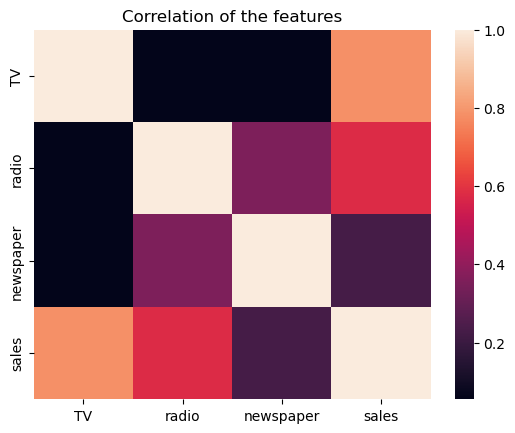

In [69]:
sns.heatmap(data = advert.corr())
plt.title('Correlation of the features')

## Data Preparation

In [72]:
X = advert.drop('sales', axis = 1)

In [73]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [74]:
y = advert['sales']

In [75]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

## Training | Validating | Holdout Test

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [78]:
X_validation, X_holdout_test, y_validation, y_holdout_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 101)

In [79]:
# Quick check for sanity purposes

len(X)

200

In [80]:
len(X_train)

140

In [81]:
len(X_validation)

30

In [82]:
len(X_holdout_test)

30

## Model Training

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
model = RandomForestRegressor(n_estimators = 3, random_state = 101)

In [85]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=3, random_state=101)

## Evaluating The Model

In [86]:
validation_predictions = model.predict(X_validation)

In [88]:
# validation_predictions

In [102]:
# Evaluation Metric

from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

In [103]:
MAE = mean_absolute_error(y_validation, validation_predictions)

In [104]:
print('The Mean Absolute Error: ', MAE)

The Mean Absolute Error:  0.6575555555555552


In [105]:
RMSE = np.sqrt(mean_squared_error(y_validation, validation_predictions))

In [106]:
print('The Root Mean Squared Error: ', RMSE)

The Root Mean Squared Error:  0.8542009478215644


## Hyperparmeter Tuning

In [108]:
model = RandomForestRegressor(n_estimators = 30, random_state = 101)

In [109]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=101)

In [110]:
validation_predictions = model.predict(X_validation)

In [97]:
# validation_predictions

In [111]:
MAE = mean_absolute_error(y_validation, validation_predictions)

In [112]:
print('The Mean Absolute Error: ', MAE)

The Mean Absolute Error:  0.6575555555555552


In [113]:
RMSE = np.sqrt(mean_squared_error(y_validation, validation_predictions))

In [114]:
print('The Root Mean Squared Error: ', RMSE)

The Root Mean Squared Error:  0.8542009478215644


## Final Performance Metrics

In [115]:
holdout_predictions = model.predict(X_holdout_test)

In [116]:
# holdout_predictions

In [117]:
MAE = mean_absolute_error(y_holdout_test, holdout_predictions)
print('The Mean Absolute Error: ', MAE)

The Mean Absolute Error:  0.5937777777777775


In [118]:
RMSE = np.sqrt(mean_squared_error(y_holdout_test, holdout_predictions))
print('The Root Mean Squared Error: ', RMSE)

The Root Mean Squared Error:  0.745323693040418


## Final Model

In [119]:
final_model = RandomForestRegressor(n_estimators = 30, random_state = 101)

In [120]:
final_model.fit(X,y)

RandomForestRegressor(n_estimators=30, random_state=101)

In [121]:
# Saving the Model

import joblib

In [122]:
joblib.dump(final_model, 'final_model_two.pkl')

['final_model_two.pkl']

In [46]:
# Saving the column Name
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [123]:
list(X.columns)

['TV', 'radio', 'newspaper']

In [124]:
joblib.dump(list(X.columns), 'col_names_two.pkl')

['col_names_two.pkl']

## Loading The Model and the Columns

In [125]:
loaded_col = joblib.load('col_names_two.pkl')

In [126]:
loaded_col

['TV', 'radio', 'newspaper']

In [127]:
loaded_model = joblib.load('final_model_two.pkl')

In [128]:
loaded_model

RandomForestRegressor(n_estimators=30, random_state=101)

In [129]:
# Running a campaign of the modelprediction

loaded_model.predict([[230.1, 37.8, 69.2]])

C:\Users\BenJ\Desktop\Ananconda\envs\My-Environment\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([21.99])

In [130]:
loaded_model.predict([[44.5, 39.3, 45.1]])

C:\Users\BenJ\Desktop\Ananconda\envs\My-Environment\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.68])